# COGS 118A Project - Heart Disease Detection

# Names
- Zhaoge Ouyang
- Bateliel Bassa
- Jason Hsu
- Kevin Thai
- Katelyn Dang

# Abstract 
Heart disease is one of the leading medical issues in the U.S. that has affected “as of 2018, 30.3 million U.S. adults”<a name="https://www.healthline.com/health/heart-disease/statistics"></a>[<sup>[1]</sup>](https://www.healthline.com/health/heart-disease/statistics) as reported by the CDC (Centers for Disease Control and Prevention). Our team would like to find out patterns that may lead to high risk of heart disease and possibly predict if a patient is at a high risk. We will be using 2020 annual CDC survey data of 320k adults related to their health status, provided on Kaggle. The data includes various variables regarding a patient's lifestyle and physical health, such as a person's BMI or whether they have smoked a certain number of cigarettes in their life, measured as a yes/no question. We will be training models to detect “patterns”, such that we can predict a patient’s heart condition and whether or not a patient is more likely to have heart diseases. We will split the dataset to 80% training, 10% validation, and 10% test set. With around 320,000 valid observations, the training set will have about 256,000 observations, while the validation and test set will have 64,000 observations each. The performance will be measured with accuracy.

# Background

Heart disease is one of the leading causes of death around the world. According to CDC, 659,000 people die from heart diseases in the United States. There are many factors that contribute to heart disease, including lifestyle and genetics. Health conditions such as high blood pressure, unhealthy blood cholesterol level, diabetes, and obesity increase the risk of heart dieseases. In addition, behaviors such as a diet high in saturated fat, trans fat, lack of physical exercise, alcohol abuse, tobacco use also increases a patient’s risk of heart diseases. Other than life styles, genetics and race also affect the risk of heart diseases. Genetic factors affect the risk of health conditions that are related to heart diseases, and some races are more likely to to be at risk of heart diseases than others. Lastly, heart diseases tend to happen more often as age goes up<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote).

# Problem Statement

Currently, there aren’t many tools that are able to predict the likelihood of whether a patient is at risk of heart diseases based on their lifestyle and genetics. Therefore, we want to train a model that can properly make predictions on whether a patient may have heart disease.
 Whether the patient is at potential risk of heart disease will be measured as a simple 0 or 1 output, 0 for if the patient is less likely to be at risk and 1 for if the patient is at possible risk. By reviewing the prediction outcomes, we will also be able to determine which parameters contribute the most heavily to potential risk of heart diseases. Given appropriate data that matches the variables/parameters our model is trained on, the model should be able to produce a prediction of a patient’s risk for heart disease. 

# Data

We will be using 2020 annual CDC survey data of 320k adults related to their health status, obtained on Kaggle<a name="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease"></a>[<sup>[3]</sup>](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). The dataset includes 18 variables and ~320,000 observations. Variables includes health related status such as had heart disease, smoked 100 cigarettes in their lifetime, having at least 7 (female) /14 (male) drinks a week depending, had a stroke, considered their physical or mental health to be “unwell” over the past 30 days, difficulty walking up stairs, gender, age, and BMI.

The dataset includes various kinds of data types.Gender questions were answered as Male/Female, race was measured by the participants ethnicity, General health was measured on a likert scale, age category was answered as a range from 18-24 to 80-over, BMI and sleeping time was measured as a specific number, physical and mental health from a range from 0-30, and all other variables were answered as Yes/No.From the dataset, the data on heart diseases, smoking, age, physical activity, and race are the most important to help answer our research question. Smoking, age, physical activity, and race are suspected links to heart diseases and by studying and analyzing the data between heart diseases and these links, we may be able to find which variables can increase the risk of heart disease. 

To better handle the data, we will need to transform binary data types and categorical data into one-hot encoding (i.e. The Gender column would be split into Male and Female columns). In addition, there are only about 9% of data that are labeled as having heart disease or myocardial infarction. To combat the unbalanced proportion of data is to undersample our data (reduce the number of data that contains negative cases). Note that if we proceed with undersampling data, we will lose a lot of information. However, since the dataset is quite huge, we should still have a sufficient amount of data to work with. Another possible problem we may encounter is that many features seem to also be unbalanced (i.e. proportion of people who have kidney disease is much lower than people who don’t). Therefore, we may also need to balance weights by giving the smaller class more weights.


There are certain features of this dataset that may be particularly useful in attempting to predict risk for heart disease. Some of these features are smoking, drinking alcohol, physical health, mental health, age, physical activity, as well as sex and general health. Our reasoning for choosing these features as the most important is that they come from the CDC website regarding risks for heart disease<a name="https://www.cdc.gov/heartdisease/risk_factors.htm"></a>[<sup>[4]</sup>](https://www.cdc.gov/heartdisease/risk_factors.htm). These features also line up with what we would think are relevant factors to heart disease, especially features such as smoking and physical health and activity.

### Data Handling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(f'Columns:{df.columns}\nShapes:{df.shape}')

Columns:Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Shapes:(319795, 18)


Shapes shown above shows that there are 319795 # of participants, 18 columns (17 variables with 1 label we are trying to predict)

### Data Cleaning

Look at the unique values form each catagorical data and decide how to conver the data

In [4]:
print("Catagorical Data Unique Outputs")
print(f"Heart Disease: {df['HeartDisease'].unique()}")
print(f"Smoking: {df['Smoking'].unique()}")
print(f"Alcohol Drinking: {df['AlcoholDrinking'].unique()}")
print(f"Stroke: {df['Stroke'].unique()}")
print(f"Difficult in walking: {df['DiffWalking'].unique()}")
print(f"Sex: {df['Sex'].unique()}")
print(f"Age: {df['AgeCategory'].unique()}")
print(f"Race: {df['Race'].unique()}")
print(f"Diabetic: {df['Diabetic'].unique()}")
print(f"Physical Activity: {df['PhysicalActivity'].unique()}")
print(f"General Health: {df['GenHealth'].unique()}")
print(f"Asthma: {df['Asthma'].unique()}")
print(f"Kidney Disease: {df['KidneyDisease'].unique()}")
print(f"Skin Cancer: {df['SkinCancer'].unique()}")

Catagorical Data Unique Outputs
Heart Disease: ['No' 'Yes']
Smoking: ['Yes' 'No']
Alcohol Drinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
Difficult in walking: ['No' 'Yes']
Sex: ['Female' 'Male']
Age: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Physical Activity: ['Yes' 'No']
General Health: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
Kidney Disease: ['No' 'Yes']
Skin Cancer: ['Yes' 'No']


#### Encode Guide
- Yes/No categories (multiple categories) => binary (1/0)
- Race => one hot encoding
- Diabetic => one hot encoding
- Age => int rank (order encoded)
- Sex => binary (renamed to Male as in Male = 1, Female = 0)
- General Health category => int rank (order encoded)


In [5]:
# Functions
yes_no_to_binary = lambda elem : 1 if elem == 'Yes' else 0
sex_to_binary = lambda elem : 1 if elem == 'Male' else 0
def genhealth_to_rank(elem):
    if elem == 'Excellent':
        return 4
    if elem == 'Very good':
        return 3
    if elem == 'Good':
        return 2
    if elem == 'Fair':
        return 1
    if elem == 'Poor':
        return 0
    return "ERROR"

def encode_age(age):
    if age == '18-24':
        return 18
    elif age == '25-29':
        return 25
    elif age == '30-34':
        return 30
    elif age == '35-39':
        return 35
    elif age == '40-44':
        return 40
    elif age == '45-49':
        return 45
    elif age == '50-54':
        return 50
    elif age == '55-59':
        return 55
    elif age == '60-64':
        return 60
    elif age == '65-69':
        return 65
    elif age == '70-74':
        return 70
    elif age == '75-79':
        return 75
    return 80

In [6]:
# Yes/No Convertion
df['HeartDisease'] = df['HeartDisease'].apply(yes_no_to_binary)
df['Smoking'] = df['Smoking'].apply(yes_no_to_binary)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(yes_no_to_binary)
df['Stroke'] = df['Stroke'].apply(yes_no_to_binary)
df['DiffWalking'] = df['DiffWalking'].apply(yes_no_to_binary)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(yes_no_to_binary)
df['Asthma'] = df['Asthma'].apply(yes_no_to_binary)
df['KidneyDisease'] = df['KidneyDisease'].apply(yes_no_to_binary)
df['SkinCancer'] = df['SkinCancer'].apply(yes_no_to_binary)

# Dummy Variables Convertion
dummy_race = pd.get_dummies(df['Race'])
dummy_race.rename(columns={'American Indian/Alaskan Native':'American_Indian/Alaskan_Native'}, inplace=True)
dummy_race.rename(columns={'Other':'Other_Race'}, inplace=True)
df = pd.concat([df, dummy_race], axis=1).drop('Race', axis=1)

dummy_diabetic = pd.get_dummies(df['Diabetic'])
dummy_diabetic.rename(columns={'No, borderline diabetes':'Borderline_Diabetic'}, inplace=True)
dummy_diabetic.rename(columns={'Yes (during pregnancy)':'Diabetic_during_pregnancy'}, inplace=True)
dummy_diabetic.rename(columns={'Yes':'Diabetic'}, inplace=True)
dummy_diabetic.rename(columns={'No':'Not_Diabetic'}, inplace=True)
df = pd.concat([df, dummy_diabetic], axis=1).drop('Diabetic', axis=1)

# Age Convertion
df.rename(columns={'AgeCategory':'Age'}, inplace=True)
df['Age'] = df['Age'].apply(encode_age)

# Sex Convertion
df.rename(columns={'Sex':'Male'}, inplace=True)
df['Male'] = df['Male'].apply(sex_to_binary)

# General Health Convertion
df['GenHealth'] = df['GenHealth'].apply(genhealth_to_rank)

### EDA

In [7]:
# Show datatype of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   Male                            319795 non-null  int64  
 9   Age                             319795 non-null  int64  
 10  PhysicalActivity                319795 non-null  int64  
 11  GenHealth                       319795 non-null  int64  
 12  SleepTime       

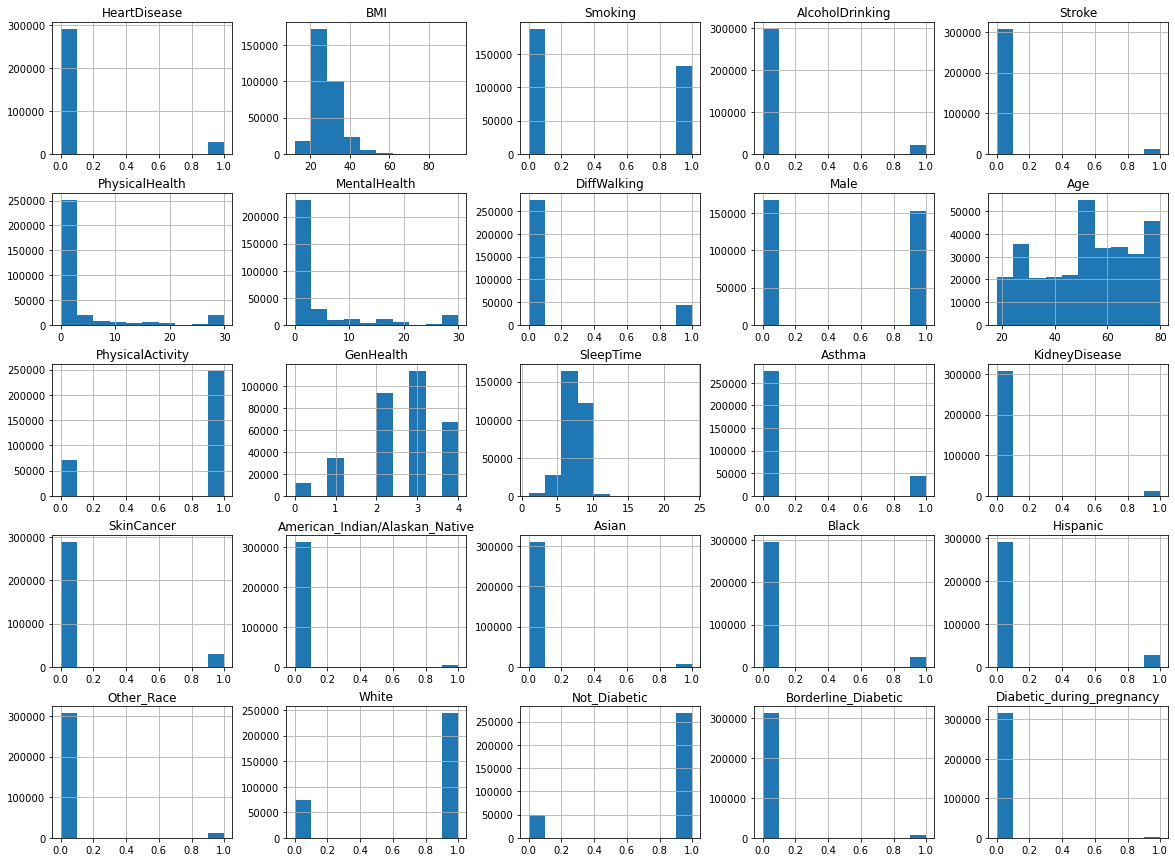

In [8]:
# View the distribution of the data
df.hist(figsize=(20,15))
plt.show()

As shown above, the amount of people who does not have heart disease significantly outweights people who have.

In [9]:
# Look at the correlation of the data
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Male,Age,...,SkinCancer,American_Indian/Alaskan_Native,Asian,Black,Hispanic,Other_Race,White,Not_Diabetic,Borderline_Diabetic,Diabetic_during_pregnancy
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.232325,...,0.093317,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.170977,0.016182,-0.013930
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.001740,...,-0.033644,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060,-0.208232,0.049231,0.008198
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.130384,...,0.033977,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367,-0.055127,0.007143,-0.005385
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.058837,...,-0.005702,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342,0.057644,-0.008165,-0.004077
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137280,...,0.048116,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.102787,0.011172,-0.004526
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110789,...,0.041700,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968,-0.153469,0.021437,-0.000773
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155455,...,-0.033412,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489,-0.032353,0.011056,0.018742
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.242552,...,0.064840,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.209640,0.031843,-0.007040
Male,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067682,...,0.013434,-0.003434,0.013716,-0.037280,-0.003607,0.008762,0.017314,0.003636,-0.004295,-0.085477
Age,0.232325,-0.001740,0.130384,-0.058837,0.137280,0.110789,-0.155455,0.242552,-0.067682,1.000000,...,0.262208,-0.024922,-0.084104,-0.034563,-0.162269,-0.061319,0.193558,-0.204576,0.048657,-0.033325


Looking at the correlation of each variable with Heart Disease, seems like there isn't a specific variable that highly correlat with heart disease.

Below, we decided to visualize the correlation of smoking with heart disease and the correlation of age vs heart disease. These two are among the common features that causes heart diseases.

Text(0.5, 1.0, 'Percentage of Heart Disease Patients that Smoke vs Does not Smoke')

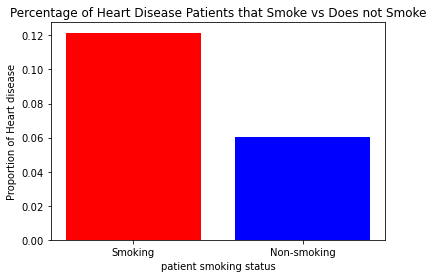

In [10]:
fig, ax = plt.subplots(figsize = (6,4))

heart_disease_smoking_cnt = len(df[(df['HeartDisease']==1) & (df['Smoking']==1)]['Smoking'])
smoking_cnt = len(df[df['Smoking']==1]['Smoking'])
heart_disease_no_smoking_cnt = len(df[(df['HeartDisease']==1) & (df['Smoking']==0)]['Smoking'])
non_smoking_cnt = len(df[df['Smoking']==0]['Smoking'])

smoking_heart_diseases = heart_disease_smoking_cnt/smoking_cnt
not_smoking_heart_diseases = heart_disease_no_smoking_cnt/non_smoking_cnt

ax.bar(["Smoking", "Non-smoking"], [smoking_heart_diseases, not_smoking_heart_diseases], color=['r','b'])
ax.set_xlabel("patient smoking status")
ax.set_ylabel("Proportion of Heart disease")
plt.title("Percentage of Heart Disease Patients that Smoke vs Does not Smoke")

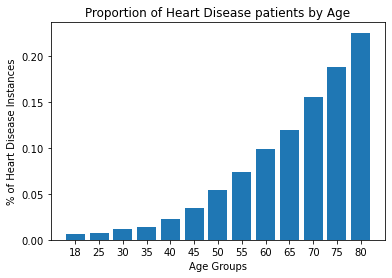

In [11]:
# visualize the proportion of heart disease vs age
x_label = ['18', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']

count_by_age_df = df["Age"].value_counts()
count_by_age_arr = [count_by_age_df[int(i)] for i in x_label]

count_by_hd_age_df = df[df["HeartDisease"]==1]["Age"].value_counts()
count_by_hd_age_arr = [count_by_hd_age_df[int(i)] for i in x_label]

proportion = [count_by_hd_age_arr[i]/count_by_age_arr[i] for i in range(len(x_label))]

plt.figure(figsize=(6, 4))
plt.bar(x_label, proportion)
plt.xlabel("Age Groups")
plt.ylabel("% of Heart Disease Instances")
plt.title("Proportion of Heart Disease patients by Age")
plt.show()

# Proposed Solution

We will be developing a logistic regression, K-NN, Neuro Network, and Random Forest model, given parameters, such as smoking, alcohol drinking, and etc., to predict whether a patient is likely to have heart diseases or not. The goal of having these models is to find the best model that can make heart disease predictions. With logistic regression, we can also make inference on which variable influences the decision.

By discovering similar characteristics for patients who have heart disease, along with a substantial number of observations, we hope to apply some of these characteristics as a more general prediction for patients who could have heart disease in the future as a preventative measure.

# Evaluation Metrics

10% out of 320,000 observations in the total dataset will be used toward the test set. Note the proportion may be changed depending on how we modify our approach (we may need to reduce the number of patients with no heart disease to balance out the heart disease variable proportion).

The F1 score best fits our research question because it measures how correctly our data is classified without putting a heavier weight on True Positives or False Negatives since it is a harmonic mean between precision and recall. Additionally, we chose not to use the accuracy metric because our data is pretty unbalanced, with a very low proportion of patients with heart disease which can lead to a biased or misleading interpretation of results when using the accuracy metric. Therefore, F1 provides a more holistic interpretation of results, as it takes into account both precision and recall, while not be as affected by our unbalanced data like accuracy would. However, recall score being much more important than percision will also be monitored throughout the project.

# Results

In [12]:
# Additional Imports
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

### Data Split

Split the data into train/test, we will use stratified shuffle split as people who have heart disease heavily outweights people who does not.

In [13]:
from sklearn.model_selection import train_test_split

# Note Column Names Are Not Included
data = df.to_numpy()
X = data[:,1:]
y = data[:,0]

# Split data (with stratified shuffle split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)

# Output shape of each dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287815, 24), (31980, 24), (287815,), (31980,))

### Baseline Preformance Estimation
#### Logistic Regression 1.0

Here, we will preform a simple logistic regression to provide a baseline of what the most general case of logistic regression can provide.

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, random_state=1)
clf = logreg.fit(X_train, y_train)

In [15]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     29243
         1.0       0.56      0.11      0.19      2737

    accuracy                           0.92     31980
   macro avg       0.74      0.55      0.57     31980
weighted avg       0.89      0.92      0.89     31980



As shown above, the test-accuracy seems very good with a score of 0.92. However, if we look closely, the recall and f1-score is terrible being 0.11 and 0.19.

Our baseline performance preforms extremely poorly. As shown by the confusion matrix above, logistic regression works decently well when looking at accuracy. However, the classification of whether a patient may have heart disease is more important when the patient actually has heart disease. When looking at its precision and recall, we can see that logistic regression does a poor job of classifying those with heart disease properly. Logistic regression only classified 56% of patients as having heart disease correctly out of all patients that it had classified as having heart disease (precision). Also, only a measly 11% were properly classified as having heart disease out of all patients who did (recall). With our focus on classification of patients having heart disease, recall is a very important metric as those with heart disease should be properly identified as having heart disease. In addition, the f1 score obtained is 0.19, this further shows our baseline algorithm's inability to predict correctly.

#### Logistic Regression Continued: Attempt to fix the issue

To fix the issue of unbalanced dataset in terms of labeling, there are few solutions on our mind. Below, we will be trying one of them by introducing class weight to logistic regression:

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, random_state=1, class_weight="balanced")
clf = logreg.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     29243
         1.0       0.23      0.78      0.35      2737

    accuracy                           0.75     31980
   macro avg       0.60      0.76      0.60     31980
weighted avg       0.91      0.75      0.80     31980



Above, we introduced class_weight with the "balanced" setting that sklearn have. Without dividng deep into the dataset (for now), this setting give us a much better recall value, while prevision worsten. However, we view this as an significant improvement as the more important recall score went from 0.11 (without class_weight) to 0.78 (with class_weight). F1 score also have an improvement through the combination of the significant increment of recall and decrease of precision. F1 score went from 0.19 (without class_weight) to 0.35 (with class_weight).

Note: there are still a significant room for improvement. There are more things we can try such as remove some of the healthy patient data to achieve balance, try out different algorithem, and manually adjust class weight.

#### KNN 1.0

We also tried using KNN and see if the result would improve, however both f1 and recall scores preformed poorly.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

num_neigh = [*range(1, 10, 2)]
recall_scores = []
f1_scores = []

for num in num_neigh:
    neigh = KNeighborsClassifier(n_neighbors = num)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall_scores.append(recall_score)
    f1_scores.append(f1_score)
# want to minimize false negative and maximize true positive

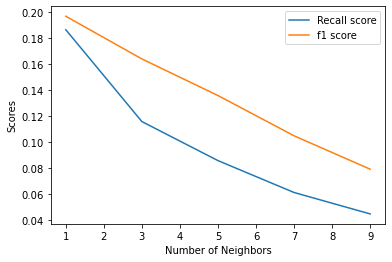

In [18]:
plt.plot(num_neigh, recall_scores, label = 'Recall score')
plt.plot(num_neigh, f1_scores, label = 'f1 score')
plt.ylabel('Scores')
plt.xlabel('Number of Neighbors')
plt.legend()

#### Neuro Network 1.0
As shown below, neuro network model completely fails to identify patients with heart disease. We obtained an f1 score of 0.00 as Neuro Network decided to classify every patient as having no heart disease.

In [19]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1, max_iter=1000)
nn.fit(X_train, y_train)
y_test_pred = nn.predict(X_test)
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96     29243
         1.0       0.00      0.00      0.00      2737

    accuracy                           0.91     31980
   macro avg       0.46      0.50      0.48     31980
weighted avg       0.84      0.91      0.87     31980



#### Random Forest 1.0
This algorithem also did not preform well (even with balance setting on class_weight!).

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=25, class_weight="balanced")

rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     29243
         1.0       0.31      0.12      0.17      2737

    accuracy                           0.90     31980
   macro avg       0.62      0.55      0.56     31980
weighted avg       0.87      0.90      0.88     31980



Interesting thing to note is having class_weight="balanced" for logistic regression improved the recall and f1-score significantly, but this is not the case for RF.

Seems like the problem of unbalanced data occurs throughout all the algorithems presented. We would need to fix the unbalanced data issue.

## Data Re-handling

Seeing the poor results from the algorithms above, we decided to balance out the data by preofrming Oversampling and Standard Scaler.

In [21]:
# Additional imports
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [22]:
# Obtain X and Y dataframe
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

We want to split the data first, then preform oversampling to avoid artificially inflate the result score.

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10,shuffle=True,random_state=1, stratify=y)

In [24]:
y_train.value_counts()

0    263179
1     24636
Name: HeartDisease, dtype: int64

### Preform Oversampling

As seen above, our label's positive (1) case is very under-represented. We will attempt to balance the data by random oversampling. By random-oversampling, we balanced the variable.

In [25]:
sampler = RandomOverSampler(random_state=1)
X_train, y_train = sampler.fit_resample(X_train,y_train)

y_train.value_counts()

0    263179
1    263179
Name: HeartDisease, dtype: int64

### Preform Data Standardization

Looking at the histogram at EDA, we can see that many features are quite unbalanced. For example, there are a lot more people who don't have kidney disease than people who does. By standardizing the features weights will now be standardized.

In [26]:
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)

# transform the test set as well
X_test = standardizer.transform(X_test)

### Algorithm Preformances
#### Logistic Regression 2.0

In [27]:
# Logistic Regression 2.0, with updated data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, random_state=1)
clf = logreg.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     29243
           1       0.23      0.78      0.35      2737

    accuracy                           0.75     31980
   macro avg       0.60      0.76      0.60     31980
weighted avg       0.91      0.75      0.80     31980



Logistic Regression have the same result as above when weight_balance is set to 'balanced', this make sense as data standardization is preforming the same thing (adjusting weights).

#### K-NN 2.0

In [28]:
# KNN 2.0, with updated data
from sklearn.neighbors import KNeighborsClassifier

num_neigh = [*range(1, 20, 2)]
recall_scores = []
f1_scores = []

for num in num_neigh:
    neigh = KNeighborsClassifier(n_neighbors = num)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall_scores.append(recall_score)
    f1_scores.append(f1_score)
# want to minimize false negative and maximize true positive

max recall score: 0.7175739861161856


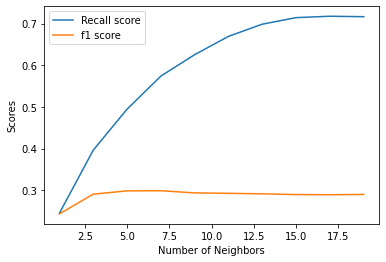

In [29]:
plt.plot(num_neigh, recall_scores, label = 'Recall score')
plt.plot(num_neigh, f1_scores, label = 'f1 score')
plt.ylabel('Scores')
plt.xlabel('Number of Neighbors')
plt.legend()
print(f'max recall score: {max(recall_scores)}')

There is an improvement to K-NN now, as # of neightbor increases, the recall score significantly increases.

#### Neuro Network 2.0

Previously, Neuro Network completely failed to learn the data and we received an f1-score of 0.00. We will run NN again to see if balanced data will improve the results.

In [30]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1, max_iter=1000)
nn.fit(X_train, y_train)
y_test_pred = nn.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83     29243
           1       0.22      0.81      0.34      2737

    accuracy                           0.73     31980
   macro avg       0.60      0.77      0.59     31980
weighted avg       0.91      0.73      0.79     31980



Neuro Network preformed the best out of all the algorithems when it comes to recall score.

#### Random Forest 2.0
Let's see if we can obtain a better result this time with Random Forest.

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=25)

rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29243
           1       0.30      0.23      0.26      2737

    accuracy                           0.89     31980
   macro avg       0.62      0.59      0.60     31980
weighted avg       0.88      0.89      0.88     31980



Random Forest did have an improvement from before but actually did not preform as well as we imagined even with a much more y label and class weight balanced dataset.

### Hypter-parameter tuning

We are interested in fine-tuning the parameters. However, due to the limit of time, we decided to preform RandomizedSearchCV on Random Forest and Logistic Regression.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [1,2,4,6],
    'criterion': ['entropy','gini']
}

rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=30,
                        cv=5, n_jobs=-1, random_state=1)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=25),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   random_state=1)

In [40]:
print("Best Parameter:")
print(rs.best_params_)

Best Parameter:
{'n_estimators': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 120, 'criterion': 'gini'}


#### Random Forest 3.0

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=120, max_features='log2', n_estimators=34,
                           min_samples_split=2, min_samples_leaf=1)

rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29243
           1       0.30      0.21      0.25      2737

    accuracy                           0.89     31980
   macro avg       0.61      0.58      0.59     31980
weighted avg       0.87      0.89      0.88     31980



The results of Random Forest score actually decreased. We believe that this could possibly be fixed/improved if we preform grid search. However, due to it being a lower score over all, we will not continue investigate RF further at the moment.

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=1)

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.25, 0.5, 1, 10],
    'solver': ['lbfgs', 'saga']
}

rs1 = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, n_iter=8,
                         cv=5, n_jobs=-1, random_state=1)

rs1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=1),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.25, 0.5, 1, 10],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'saga']},
                   random_state=1)

In [43]:
print("Best Parameters:")
print(rs1.best_params_)

Best Parameters:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.5}


#### Logistic Regression 3.0

In [44]:
logreg = LogisticRegression(C=0.5, max_iter=1000, random_state=1,
                           penalty='l2', solver='lbfgs')
clf = logreg.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     29243
           1       0.23      0.78      0.35      2737

    accuracy                           0.75     31980
   macro avg       0.60      0.76      0.60     31980
weighted avg       0.91      0.75      0.80     31980



Similarily, logistic regression with randomized search cross validation also did not have a noticable improvement. Further investigation with grid-search cross validation can be done in the future with additional parameter options such as 'l1' penalty and other solvers.

# Discussion

### Interpreting the result

* **Logistic Regression performs best, but the model we would move forward with from this point would likely be Neuro Networks.**

    With our given results, Logistic Regression outperformed the other algorithms(K-Nearest Neighbors, Neuro Networks, and Random Forest) overall when comparing both the overall recall and f1-score. However, the performance of our model is to be based on its performance primarily on how well it can identify those who do have hard disease as having hard disease. As such, while F1-score does play a factor in how we determine the model we will continue to use, both the difference between the f1-score of Logistic Regression and Neuro Networks is minimal enough to overlook in order to gain better performance in the recall for Neuro Networks.



* **K-Nearest Neighbors and Random Forest both underperform in comparison to Logistic Regression and Neuro Networks.**
    
    Despite our attempts to increase the performance of the Random Forest model, the introduction of more y label and class weight did not make the performance of the Random Forest good enough to be questioned for further use.On the other hand, K-Nearest Neighbors did perform closely to Logistic Regression and Neuro networks, but its performance plateauted at about 72%. Further increase to the k value would only lead to minimal changes or decrease the performance as the model's decision boundary will smooth out making the model less and less complex.
  

* **Neuro Networks likely worked best due to the nature of the dataset being not linearly separable.**
    
    Neuro Networks works better than the other algorithms on nonlinearly separable data and since its performance in recall was the best then this was most likely the nature of the data. As shown by the performance of the K-Nearest Neighbors model, the performance of the model peaked at 72% as the k value increased. However if you were to continue to increase this value, then the performance of the algorithm would only worsen or remain relatively the same. As such the K-Nearest Neighbors's decision boundary is only getting smoother which implies that the classification of the data itself cannot be linearly separable.
    
    
* **Randomized Search Cross Validation did not improve the results much**

    Hoping to see better results in limited time, we went with randomized search cross validation on Logistic Regression hoping to see if it can yeld an even better result. We also ran randomized search on Random Forest, wondering if preformance could be improved. The result is somewhat dissapointing: 1) For Random Forest, the recall and f1 scores actually slightly decreased. 2) For logistic regression, there isn't a noticeable improvement. In the future, it would be great to try grid search cross validation to confirm the results.

### Limitations

One limitation to our work includes the limited proportions of patients diagnosed with heart disease or myocardial infarction. Having limited data or a small dataset, can lead to biases in our algorithms. We only used about 10% of our dataset for our test set, so our data size is about 32,000 observations. Another limitation we had was although we decided to use the f1-score for our evalutation metric since our data was unbalanced, however, we found that the recall score actually works better for our research question. Recall puts a heavier emphasis on False Negatives, which are very detrimental to our research question, since it would be all the patients who were not diagnosed with heart disease, but actually had a heart disease. We were worried that recall would not be a good choice for our project, because our data was so unbalanced, however, through random oversampling and data standardization, we were able to balance our data so recall would not be too biased. Therefore, recall was better suited as our evaluation metric, rather than the F1 score that is just a harmonic mean between the recall and precision. Another limitation we had was that since we had to balance our data using random oversampling and data standardization, this could lead to possible overfitting and increase the variance of our results.


Due to the limit of time and resource, we were unable to further investigate how to improve our model preformance with parameter tuning. We tried running support vector machine, hoping that it would give us a better result than logistic regression. However, training time for SVM turns out to be 5+ hours, thus we decided to terminate the process. Our work have set some ground work for better undrestanding the data. In the future, it would be great to run cross validation and grid search to select the best features and parameters.

## Ethics & Privacy

Our datasets comes from a public dataset. Since our dataset comes from a survey that was collected by the CDC, the methods of data collection shouldn't be a violation of privacy as long as their name and personal information is not included. Additionally, in terms of data storage, we do not hold any personal information of the participants of the survey and it is a public dataset, so fears of data leakage or data deletion should not pose a problem. Additionally, this survey was taken by over 320,000 adults across all 50 states, so there is a very big sample to help decrease any bias and increase generalizability to adults in the U.S. However, since, only about 10% of our data includes positive cases, we would only use that smaller sample for the test set. This could lead to a potential bias towards a certain age or racial group in our data. 

## Conclusion

Our main goal with this project was to see how training certain models on whether some has heart disease. Through seeing which model performed the best, it would help us understand the factors that underlie heart disease better. With our results it is possible to say that the factors that lead to heart disease may not be as simple as a linear relationship between the factor and risk of heart disease. This could be seen in our best performing model, a neural network, is knwon for being able to classify nonlinear relationships well. For research the medical field, this can serve as a introduction into understanding the factors of heart disease. In the future, people can work to better understand which classifer is the best for these factors, as well as understanding which factor matters the most in determining heart disease.

# Footnotes
<a name="healthlinenote"></a>1.[^](#healthline):  Thomas, J. (16 July 2020) Heart Disease: Facts, Statistics, and You. Healthline Media. https://www.healthline.com/health/heart-disease/statistics <br>
<a name="admonishnote"></a>2.[^](#admonish): Heart Disease Facts CDC. https://www.cdc.gov/heartdisease/facts.htm <br>
<a name="sotanote"></a>3.[^](#sota): Data source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease <br>
<a name="sotanote"></a>4.[^](#sota): Know Your Risk for Heart Disease. CDC.: https://www.cdc.gov/heartdisease/risk_factors.htm